# Regresja

Dane wykorzystywane w pierwszej części ćwiczeń pochodzą z materiałów do książki: [F. Nwanganga, M. Chapple: Praktyczne uczenie maszynowe w języku R]("https://www.wiley.com/en-ie/Practical+Machine+Learning+in+R-p-9781119591511").



## 1. Prosta regresja liniowa

### Wczytanie danych

Pobierz dane `bikes.csv` do swojego katalogu roboczego, a następnie wczytaj je. Użyj argumentu `col_types` żeby ustawić typ poszczególnych kolumn: `D` - data, `f` - faktor, `d` - double.

In [1]:
library(tidyverse)
library(gridExtra)
library(corrplot)
library(repr)
options(jupyter.rich_display=FALSE,
        repr.plot.width=15,
        repr.plot.height=8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.95 loaded



In [2]:
rowery <- read_csv("data/bikes.csv", col_types = "Dffffddddd")

Wyświetl podgląd danych za pomocą funkcji `glimpse()`

In [3]:
glimpse(rowery)

Rows: 731
Columns: 10
$ date        <date> 2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-0…
$ season      <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ holiday     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ weekday     <fct> 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4…
$ weather     <fct> 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2…
$ temperature <dbl> 46.71653, 48.35024, 34.21239, 34.52000, 36.80056, 34.88784…
$ realfeel    <dbl> 46.39865, 45.22419, 25.70131, 28.40009, 30.43728, 30.90523…
$ humidity    <dbl> 0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261…
$ windspeed   <dbl> 6.679665, 10.347140, 10.337565, 6.673420, 7.780994, 3.7287…
$ rentals     <dbl> 985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822, 1321, 12…


Wyświetl i przeanalizuj statystyki opisowe danych `rowery`.

In [4]:
summary(rowery)

      date            season  holiday weekday weather  temperature   
 Min.   :2011-01-01   1:181   0:710   6:105   2:247   Min.   :22.60  
 1st Qu.:2011-07-02   2:184   1: 21   0:105   1:463   1st Qu.:46.12  
 Median :2012-01-01   3:188           1:105   3: 21   Median :59.76  
 Mean   :2012-01-01   4:178           2:104           Mean   :59.51  
 3rd Qu.:2012-07-01                   3:104           3rd Qu.:73.05  
 Max.   :2012-12-31                   4:104           Max.   :90.50  
                                      5:104                          
    realfeel         humidity        windspeed          rentals    
 Min.   : 12.59   Min.   :0.0000   Min.   : 0.9322   Min.   :  22  
 1st Qu.: 43.34   1st Qu.:0.5200   1st Qu.: 5.6182   1st Qu.:3152  
 Median : 61.02   Median :0.6267   Median : 7.5343   Median :4548  
 Mean   : 59.55   Mean   :0.6279   Mean   : 7.9303   Mean   :4504  
 3rd Qu.: 75.50   3rd Qu.:0.7302   3rd Qu.: 9.7092   3rd Qu.:5956  
 Max.   :103.10   Max.   :0.9725

Narysuj wykresy punktowe porównujące `rentals` (liczbę wypożyczonych rowerów) do trzech innych zmiennych (`humidity`, `windspeed` oraz `temperature`). Co możesz powiedzieć na temat zależności między zmienną `rentals` a pozostałymi wybranymi zmiennymi na podstawie samych wykresów?

In [5]:
head(rowery)

  date       season holiday weekday weather temperature realfeel humidity
1 2011-01-01 1      0       6       2       46.71653    46.39865 0.805833
2 2011-01-02 1      0       0       2       48.35024    45.22419 0.696087
3 2011-01-03 1      0       1       1       34.21239    25.70131 0.437273
4 2011-01-04 1      0       2       1       34.52000    28.40009 0.590435
5 2011-01-05 1      0       3       1       36.80056    30.43728 0.436957
6 2011-01-06 1      0       4       1       34.88784    30.90523 0.518261
  windspeed rentals
1  6.679665  985   
2 10.347140  801   
3 10.337565 1349   
4  6.673420 1562   
5  7.780994 1600   
6  3.728766 1606   

In [6]:
tail(rowery)

  date       season holiday weekday weather temperature realfeel humidity
1 2012-12-26 1      0       3       3       38.18597    29.37556 0.823333
2 2012-12-27 1      0       4       2       39.10253    30.12507 0.652917
3 2012-12-28 1      0       5       2       39.03197    33.49946 0.590000
4 2012-12-29 1      0       6       2       39.03197    31.99712 0.752917
5 2012-12-30 1      0       0       1       39.24347    30.72596 0.483333
6 2012-12-31 1      0       1       2       35.85947    29.75026 0.577500
  windspeed rentals
1 13.178398  441   
2 14.576687 2114   
3  6.472546 3095   
4  5.178295 1341   
5 14.602540 1796   
6  6.446527 2729   

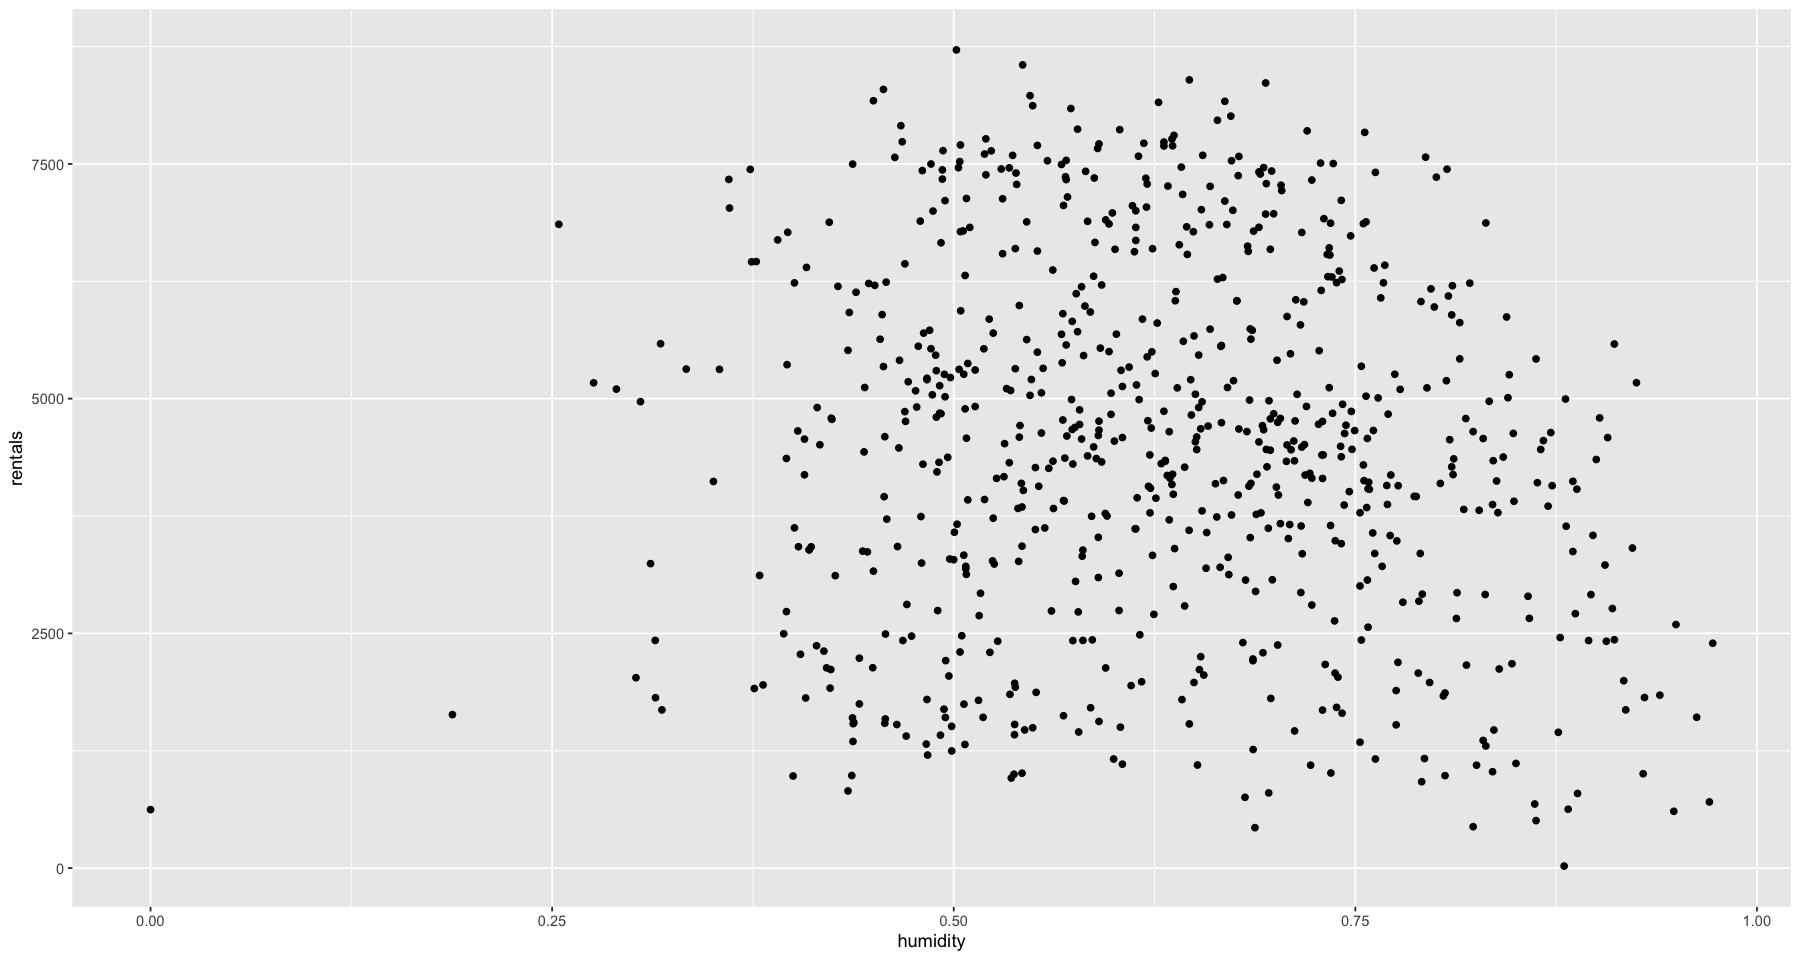

In [7]:
humid <- ggplot(data=rowery, aes(x=humidity, y=rentals)) + geom_point()
wind <-  ggplot(data=rowery, aes(x=windspeed, y=rentals)) + geom_point()
temp <-  ggplot(data=rowery, aes(x=temperature, y=rentals)) + geom_point()

humid

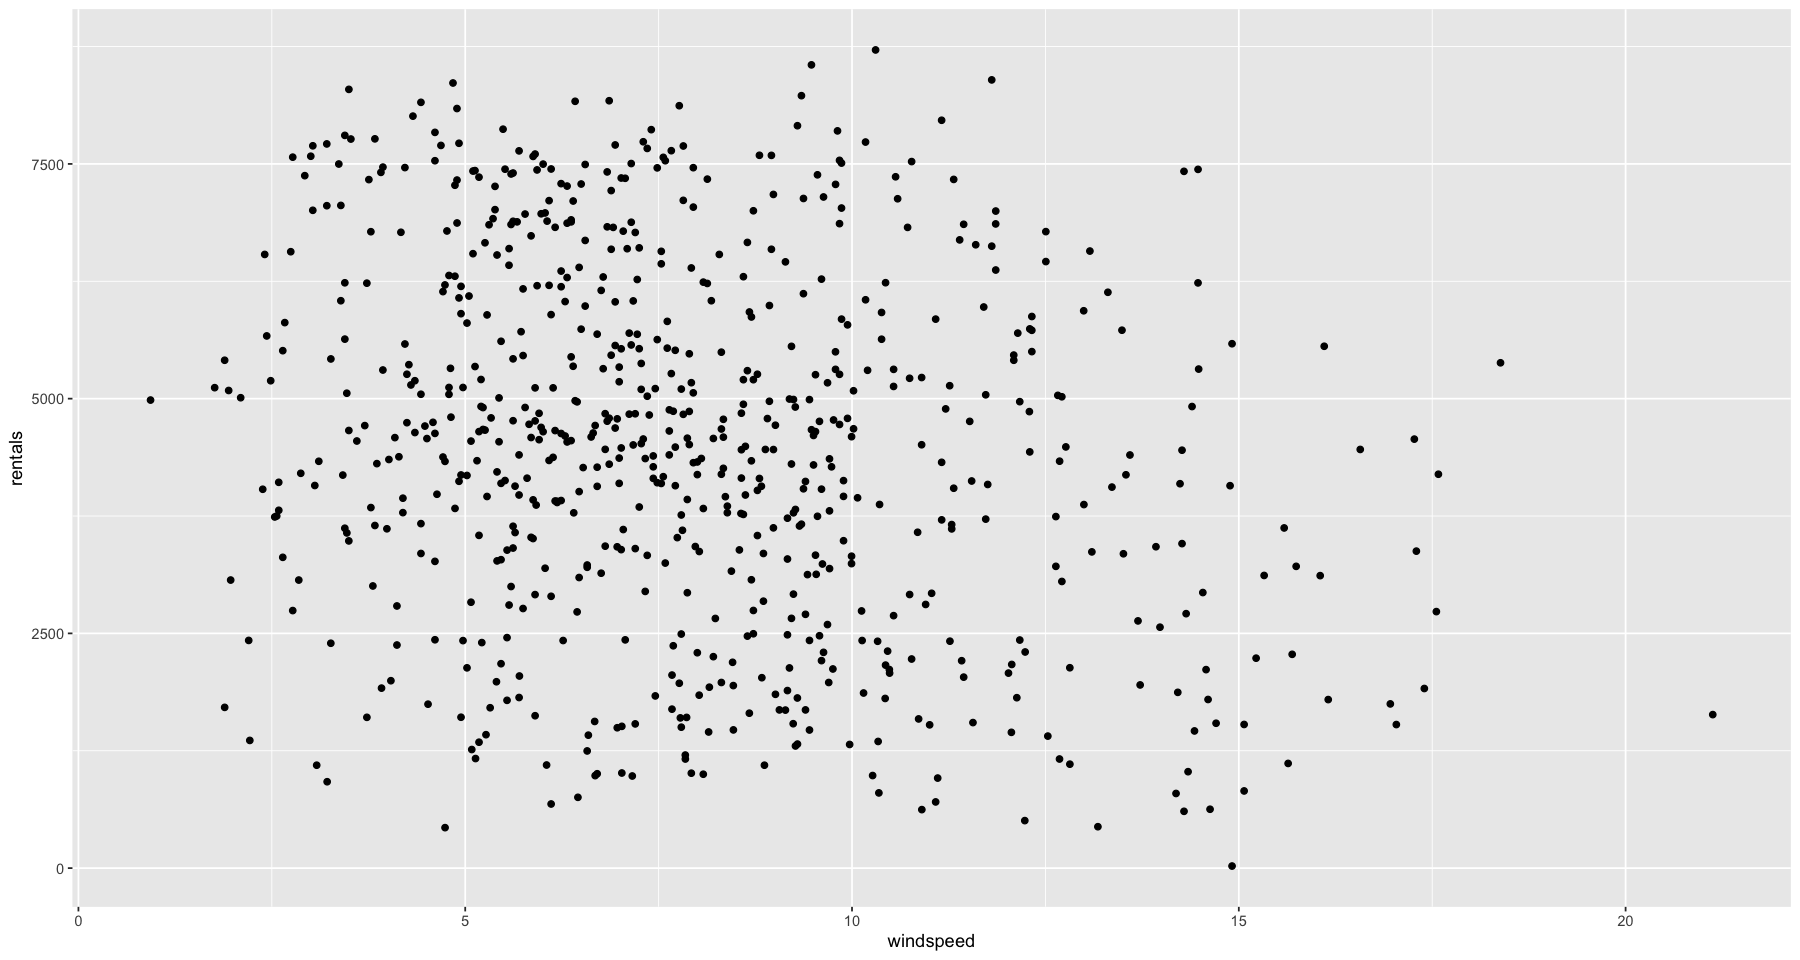

In [8]:
wind

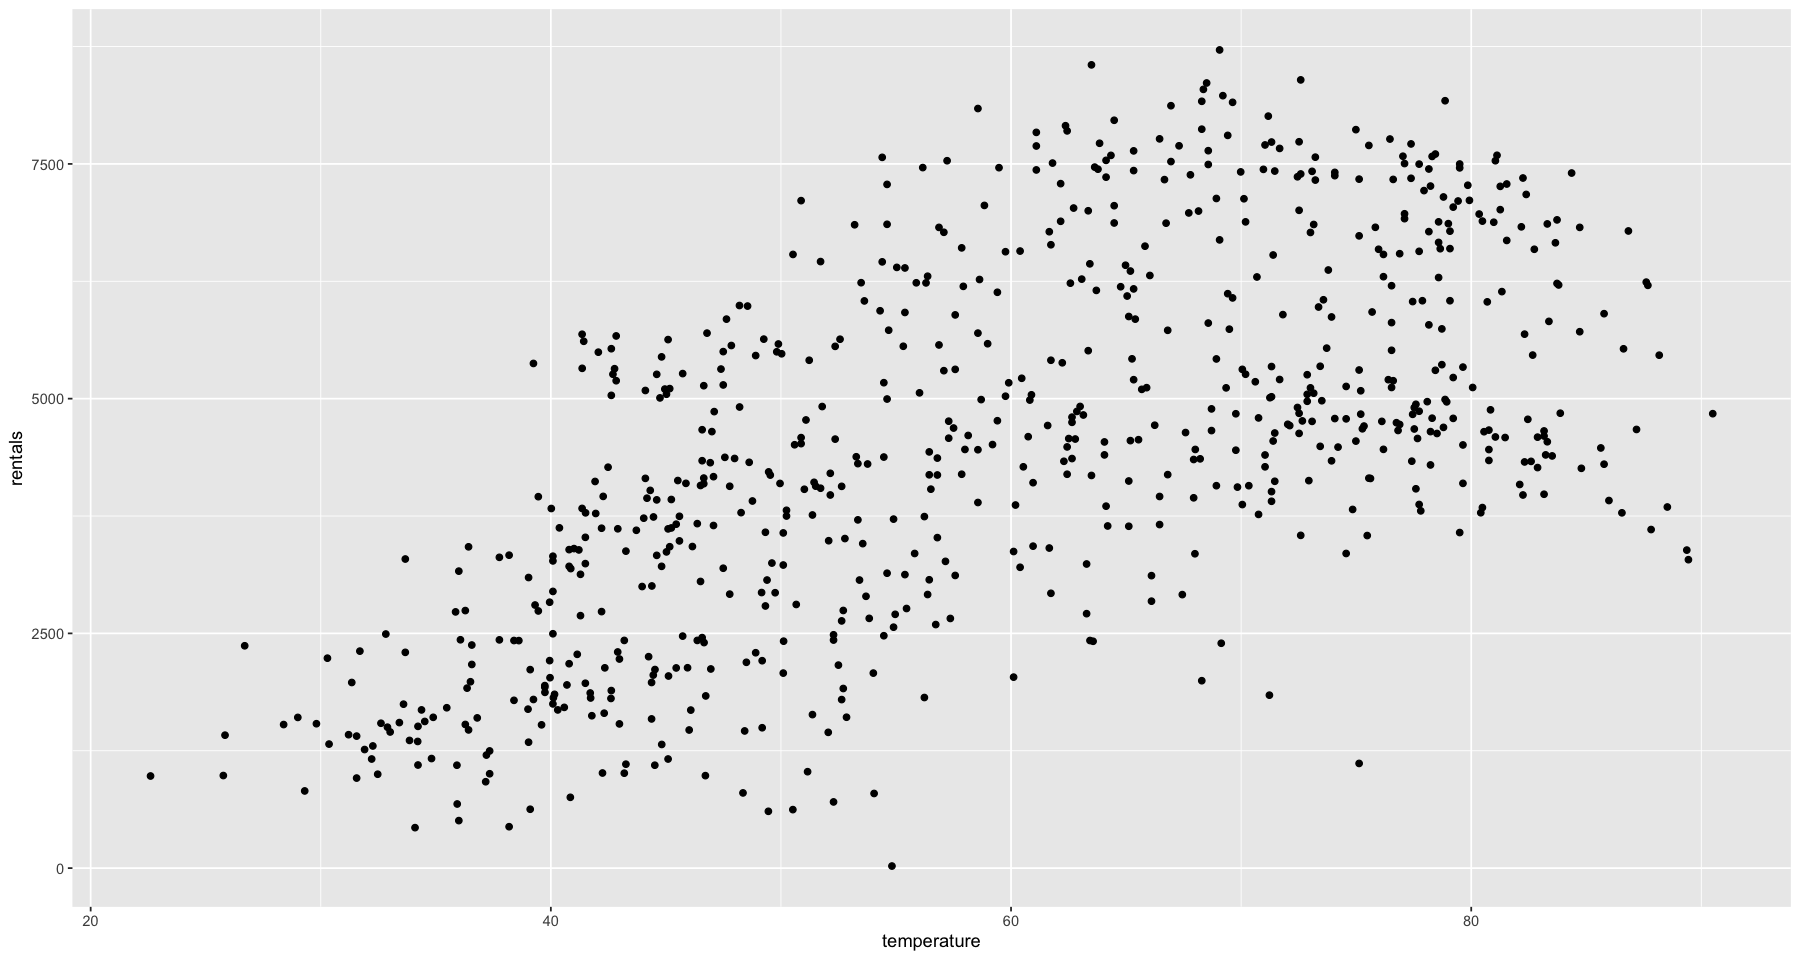

In [9]:
temp

### Korelacja

Oblicz współczynnik korelacji liniowej Pearsona pomiędzy zmiennymi `rentals` i `humidity`.

In [10]:
cov(rowery$rentals, rowery$humidity)

sd(rowery$rentals)
sd(rowery$humidity)

pearson <- cov(rowery$rentals, rowery$humidity) / 
  (sd(rowery$rentals) * sd(rowery$humidity))

pearson

[1] -27.77323

[1] 1937.211

[1] 0.1424291

[1] -0.1006586

Jaki wniosek można wyciągnąć na temat zależności pomiędzy badanymi zmiennymi na podstawie obliczonego współczynnika korelacji Pearsona?

Oblicz współczynnik korelacji Pearsona między zmienną `rentals` a zmiennymi `temperature` oraz `windspeed`, wykorzystując funkcję `cor()`.

In [11]:
cor(rowery$temperature, rowery$rentals)
cor(rowery$windspeed, rowery$rentals)

[1] 0.627494

[1] -0.234545

Na podstawie obliczonych współczynników korelacji odpowiedz na pytania:

- Czy istnieje jakaś zależność między liczbą wypożyczonych rowerów a pozostałymi zmiennymi?

- Jeśli istnieje zależność, to jak silna?

Oblicz tabelę współczynników korelacji dla  dla zmiennych liczbowych ze zbioru `rowery`. Następnie zwizualizuj korelacje za pomocą funkcji `corrplot`.

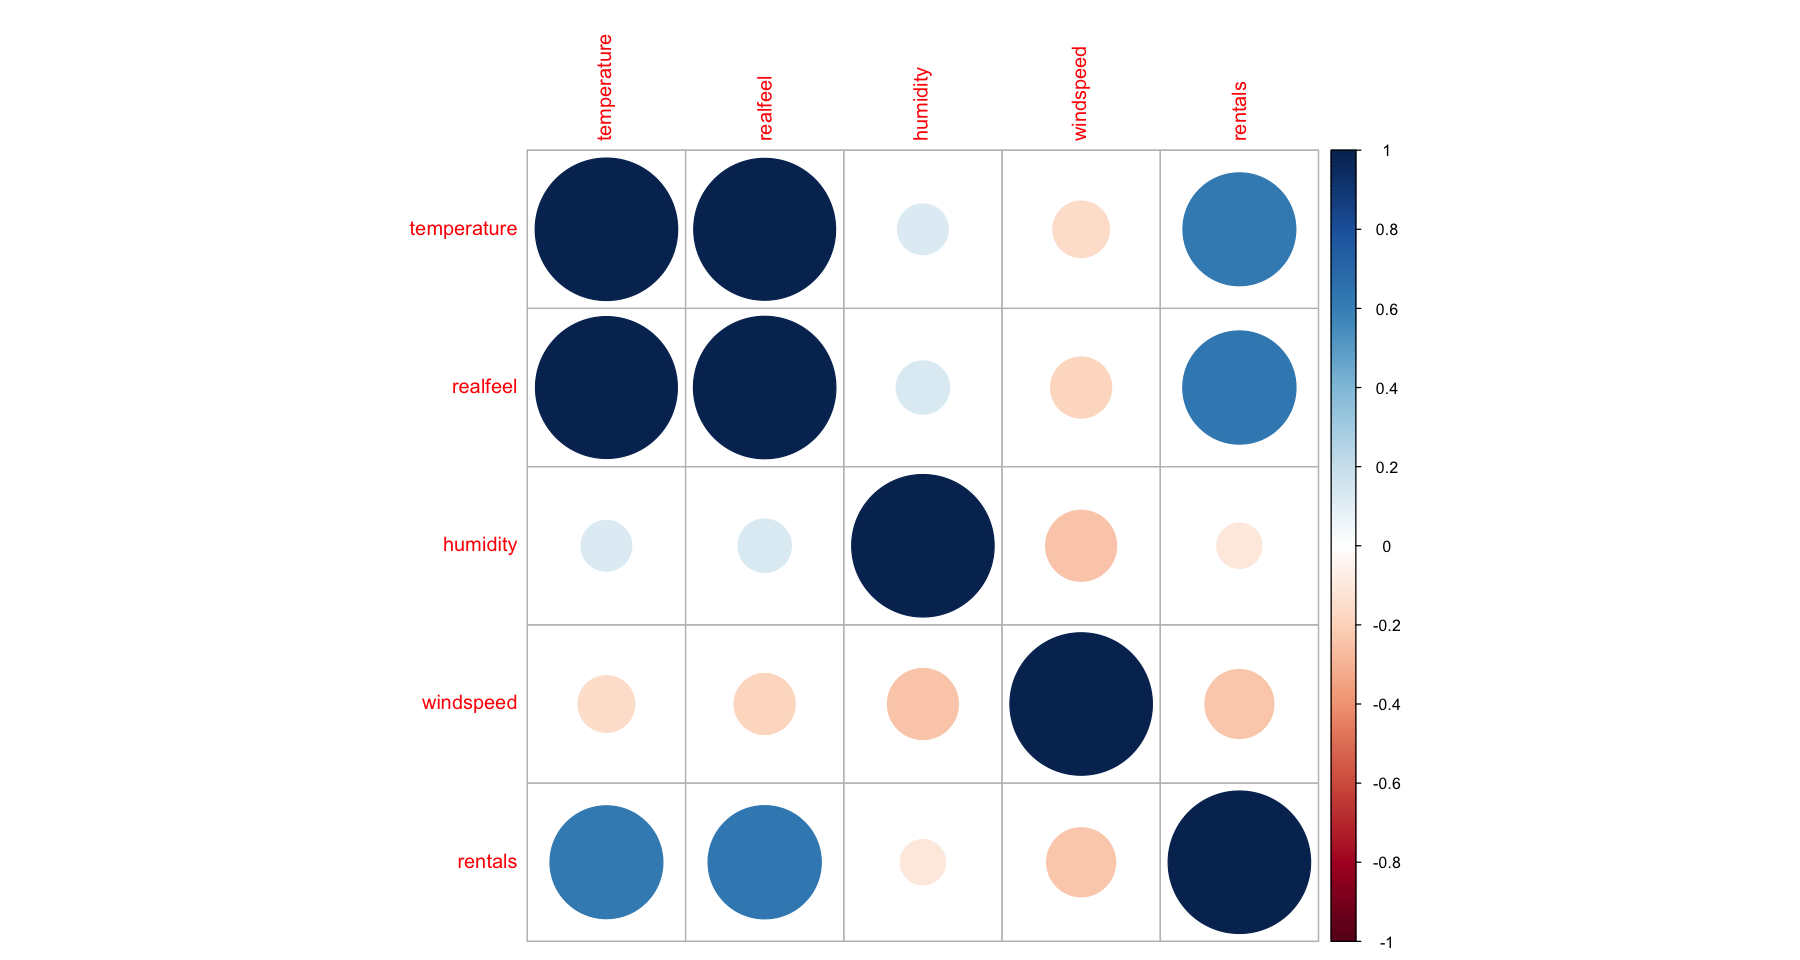

In [12]:
rowery_liczbowe <- rowery %>%
  select(-(date:weather))

rowery_korelacje <- cor(rowery_liczbowe)

library(corrplot)
corrplot(rowery_korelacje)

Ponieważ korelacja między A i B jest taka sama, jak pomiędzy B i A, możemy uprościć wizualizację, pokazując tylko współczynniki nad przekątną - służy do tego argument `type` funkcji `corrplot()`. Ponadto za pomocą argumentu `method` możemy wyświetlić wartości współczynników zamiast kółek.

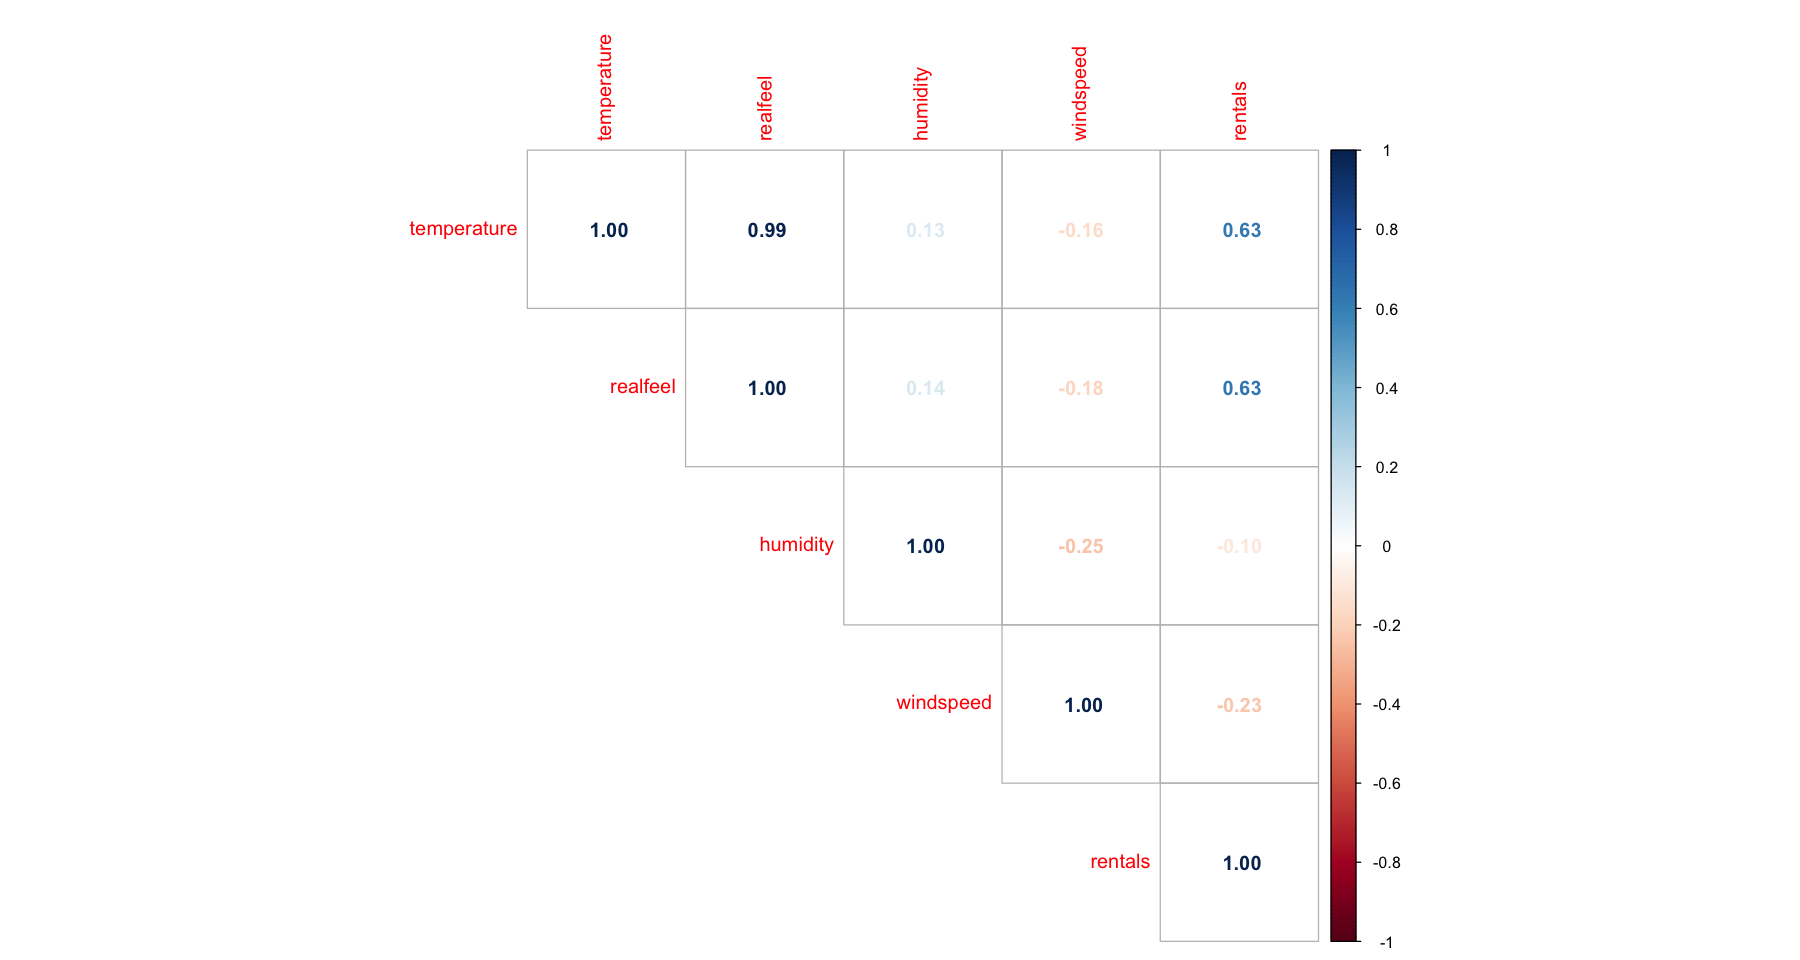

In [13]:
corrplot(rowery_korelacje, type = "upper", method = "number")

### Współczynniki prostej regresji

Ręcznie uzyskaj wartość współczynników `b0` i `b1`.

In [14]:
b1 <- cov(rowery$temperature, rowery$rentals) / var(rowery$temperature)
b1

b0 <- mean(rowery$rentals) - b1 * mean(rowery$temperature)
b0

[1] 78.49539

[1] -166.8767

### Model prostej regresji liniowej

Zbuduj model liniowy dla pary zmiennych `rentals` oraz `temperature`.

In [15]:
rowery_model1 <- lm(data = rowery, rentals~temperature)
rowery_model1


Call:
lm(formula = rentals ~ temperature, data = rowery)

Coefficients:
(Intercept)  temperature  
     -166.9         78.5  


Wyświetl bardziej szczegółowe informacje o modelu za pomocą funkcji `summary()`.

In [16]:
summary(rowery_model1)


Call:
lm(formula = rentals ~ temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4615.3 -1134.9  -104.4  1044.3  3737.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -166.877    221.816  -0.752    0.452    
temperature   78.495      3.607  21.759   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1509 on 729 degrees of freedom
Multiple R-squared:  0.3937,	Adjusted R-squared:  0.3929 
F-statistic: 473.5 on 1 and 729 DF,  p-value: < 2.2e-16


Co oznaczają statystyki podsumowujące dla reszt (sekcja `Residuals`)?

## 2. Wielokrotna regresja liniowa

Model uzyskany za pomocą pojedynczego predyktora (`temperature`) tłumaczył około 39% zmienności w zbiorze danych.  W kolejnym modelu uwzględnij dodatkowo zmienne `windspeed` oraz `humidity`.

In [17]:
rowery_model2 <- lm(data = rowery, rentals~humidity+windspeed+temperature)

summary(rowery_model2)


Call:
lm(formula = rentals ~ humidity + windspeed + temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4780.5 -1082.6   -62.2  1056.5  3653.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2706.002    367.483   7.364 4.86e-13 ***
humidity    -3100.123    383.992  -8.073 2.83e-15 ***
windspeed    -115.463     17.028  -6.781 2.48e-11 ***
temperature    78.316      3.464  22.606  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1425 on 727 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4587 
F-statistic: 207.2 on 3 and 727 DF,  p-value: < 2.2e-16


Jak oceniasz nowo powstały model? 

Napisz równanie w jaki sposób `rentals` zależy od wybranych predyktorów.


$$ \text{rentals} = 2706 + \left(-3100\times\text{humidity}\right) + \left(-115\times\text{windspeed}\right) + 78\times\text{temperature} $$

## 3. Zadania
___
1. Pobierz i wczytaj zbiór danych `Advertising.csv`.

In [18]:
df <- read_csv("data/Advertising.csv", col_select=2:5)

New names:
• `` -> `...1`
Rows: 200 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): TV, radio, newspaper, sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


___


2. Odpowiedz na pytania: 

- czy istnieje zależność pomiędzy sprzedażą a budżetem reklamowym dla usług `TV`, `radio` oraz `newspaper`.
- jeśli istnieje - jak silna jest ta zależność?
- które media są powiązane ze sprzedażą?
- jak duża jest zależność pomiędzy poszczególnymi mediami a sprzedażą?
- czy zależność jest liniowa?

In [19]:
head(df)

  TV    radio newspaper sales
1 230.1 37.8  69.2      22.1 
2  44.5 39.3  45.1      10.4 
3  17.2 45.9  69.3       9.3 
4 151.5 41.3  58.5      18.5 
5 180.8 10.8  58.4      12.9 
6   8.7 48.9  75.0       7.2 

In [20]:
tail(df)

  TV    radio newspaper sales
1 149.7 35.6   6.0      17.3 
2  38.2  3.7  13.8       7.6 
3  94.2  4.9   8.1       9.7 
4 177.0  9.3   6.4      12.8 
5 283.6 42.0  66.2      25.5 
6 232.1  8.6   8.7      13.4 

In [21]:
class(df)

[1] "tbl_df"     "tbl"        "data.frame"

In [22]:
glimpse(df)

Rows: 200
Columns: 4
$ TV        <dbl> 230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.…
$ radio     <dbl> 37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.…
$ newspaper <dbl> 69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 2…
$ sales     <dbl> 22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6…


In [23]:
summary(df)

       TV             radio          newspaper          sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:10.38  
 Median :149.75   Median :22.900   Median : 25.75   Median :12.90  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:17.40  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

In [24]:
sum(is.na(df))

[1] 0

In [25]:
any(is.na(df))

[1] FALSE

In [26]:
cor(df)

          TV         radio      newspaper  sales    
TV        1.00000000 0.05480866 0.05664787 0.7822244
radio     0.05480866 1.00000000 0.35410375 0.5762226
newspaper 0.05664787 0.35410375 1.00000000 0.2282990
sales     0.78222442 0.57622257 0.22829903 1.0000000

In [27]:
cor(df)[4,]  # variables correlation with 'sales'

       TV     radio newspaper     sales 
0.7822244 0.5762226 0.2282990 1.0000000 

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



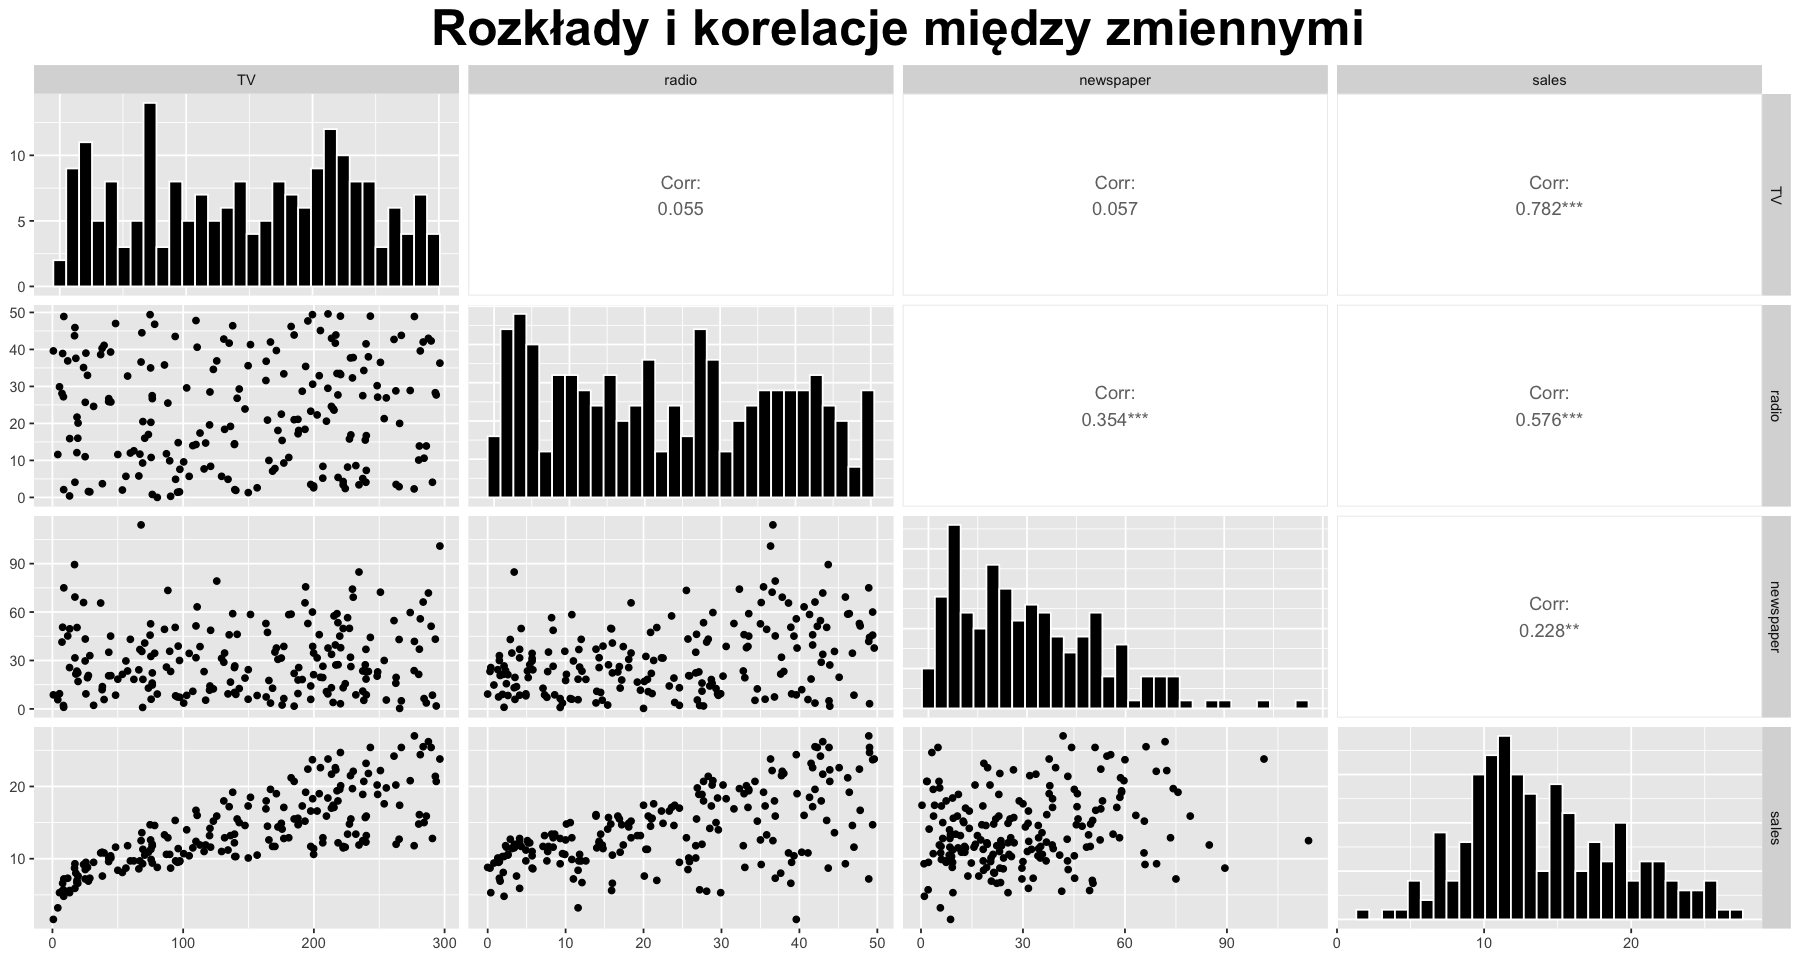

In [28]:
GGally::ggpairs(df, 
                diag = list(continuous = GGally::wrap("barDiag", bins = 30, color = "white", fill="black")))+
  ggtitle("Rozkłady i korelacje między zmiennymi") +
  theme(plot.title = element_text(size = 30, face = "bold", hjust = .5))

In [29]:
df_cor_mat_melted = reshape2::melt(cor(df), varnames=c("x", "y"), value.name="Korelacja")
head(df_cor_mat_melted)

  x         y     Korelacja 
1 TV        TV    1.00000000
2 radio     TV    0.05480866
3 newspaper TV    0.05664787
4 sales     TV    0.78222442
5 TV        radio 0.05480866
6 radio     radio 1.00000000

Warning message in geom_text(aes(label = round(Korelacja, 2)), color = "black", :
“Ignoring unknown parameters: `face`”


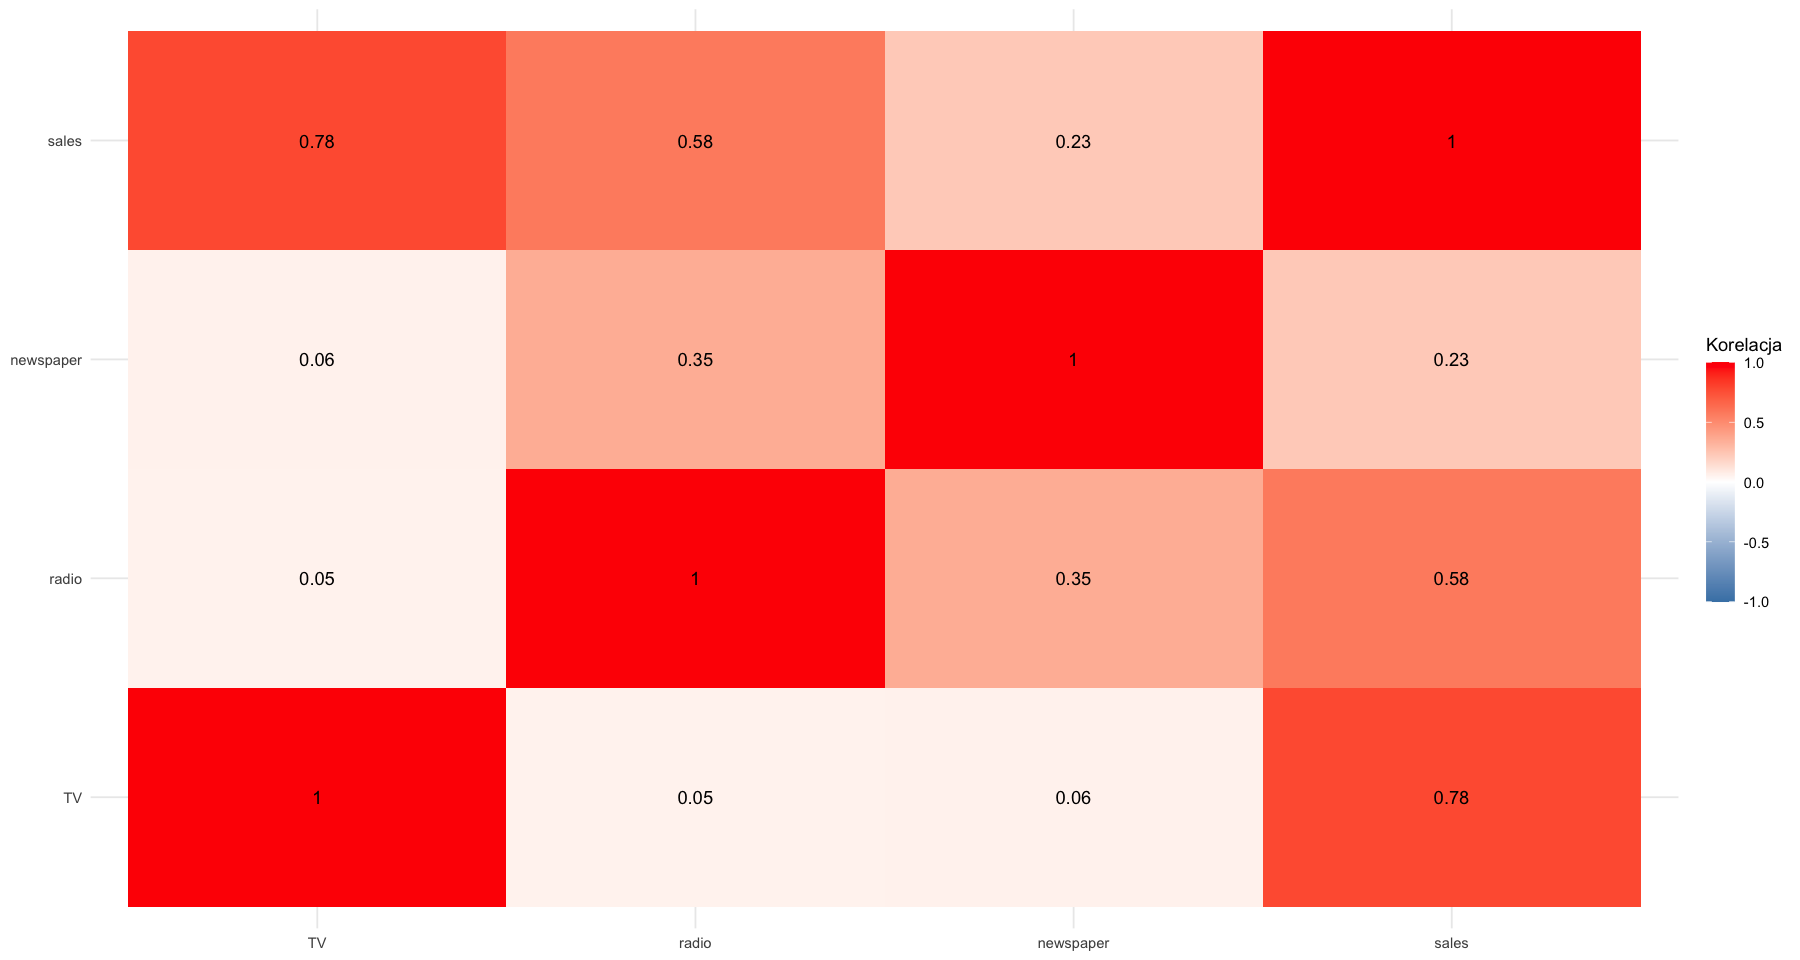

In [30]:
ggplot(df_cor_mat_melted, aes(x = x, y = y)) + 
  geom_tile(aes(fill = Korelacja)) + 
  geom_text(aes(label = round(Korelacja, 2)), color = "black", face="bold") +
  scale_fill_gradient2(low = "steelblue", mid = "white", high = "red", 
                       guide = guide_colorbar(ticks = FALSE, barheight = 10), 
                       limits = c(-1, 1)) + 
  theme_minimal() + 
  labs(x = NULL, y = NULL)

___


Call:
lm(formula = as.formula(paste(y, "~", x)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16



Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'


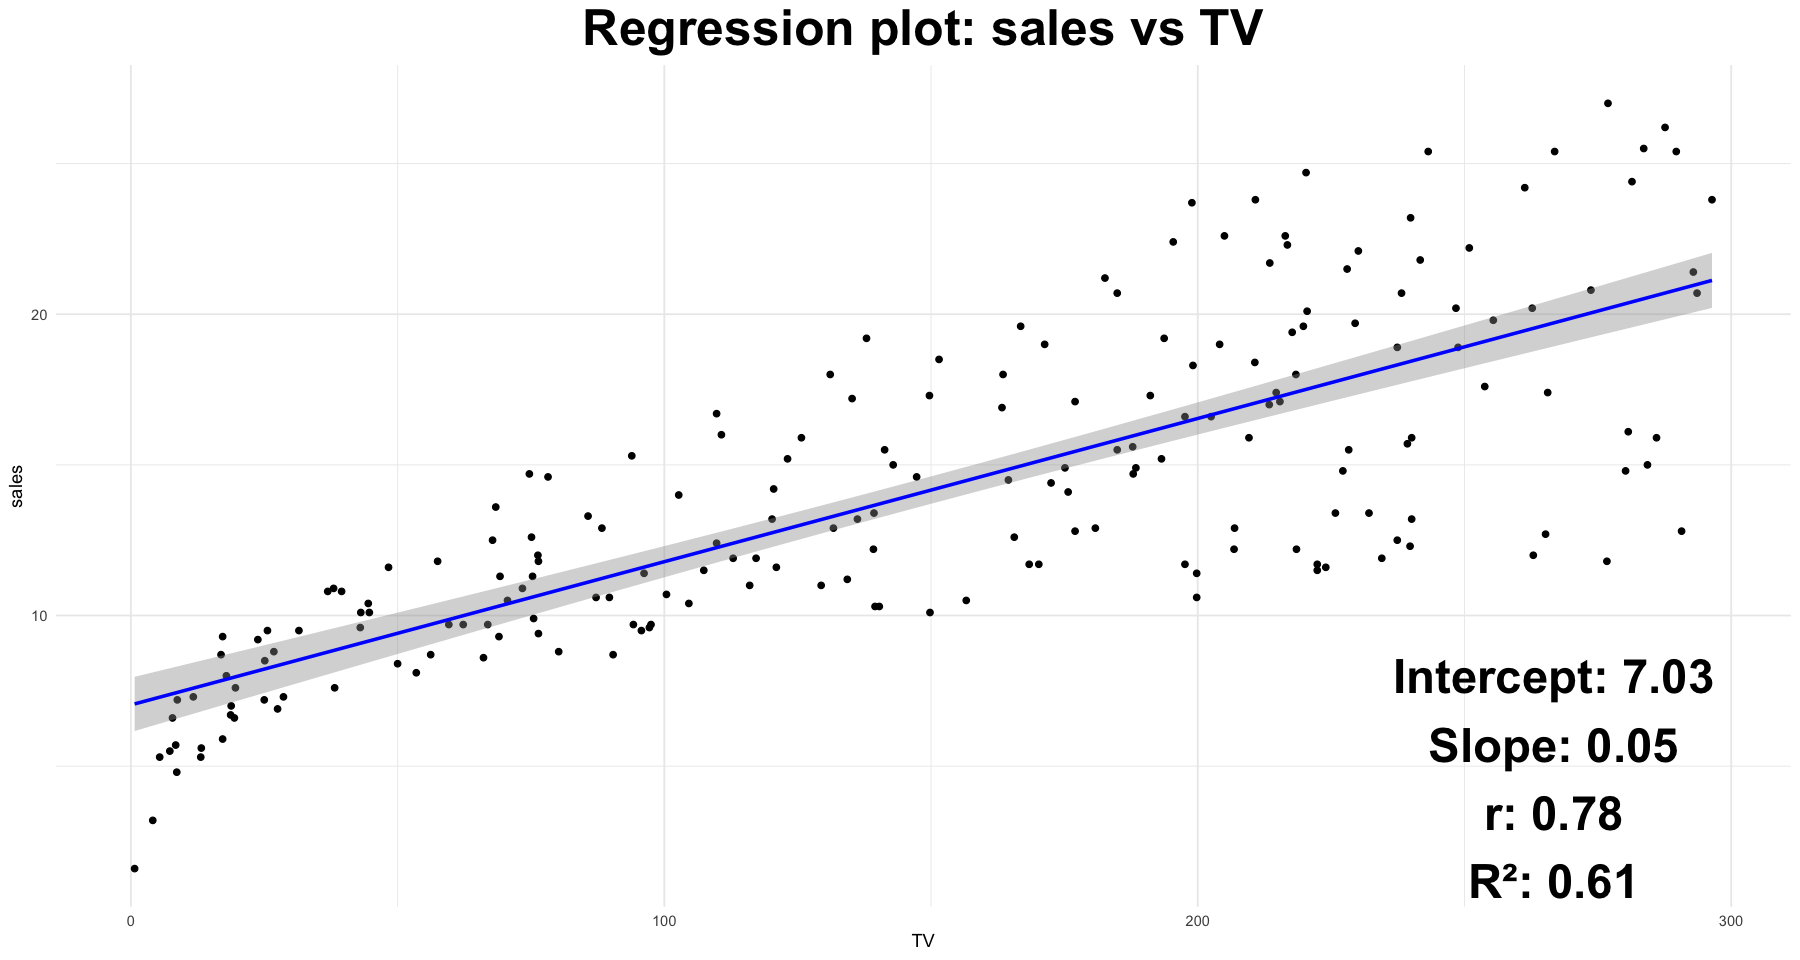

In [31]:
regplot <- function(data, x, y) {
  model <- lm(as.formula(paste(y, "~", x)), data = data)
  print(summary(model))
  
  intercept <- coef(model)[1]
  slope <- coef(model)[2]
  r_squared <- summary(model)$r.squared
  r <- sqrt(r_squared)  
  
  p <- ggplot(data, aes_string(x = x, y = y)) +  
    geom_point() +  
    geom_smooth(method = "lm", color = "blue", se = TRUE) +  
    ggtitle(glue::glue("Regression plot: {y} vs {x}")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 30, face = "bold", hjust = 0.5)) +
    annotate("text", x = max(data[[x]])-(0.1*max(data[[x]])), y = min(data[[y]]+3), 
             label = glue::glue("Intercept: {round(intercept, 2)}\nSlope: {round(slope, 2)}\nr: {round(r, 2)}\nR²: {round(r_squared, 2)}"), 
             size = 10, color = "black", 
             fontface = "bold")

  print(p)
}


regplot(data = df, x = "TV", y = "sales")


Call:
lm(formula = as.formula(paste(y, "~", x)), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


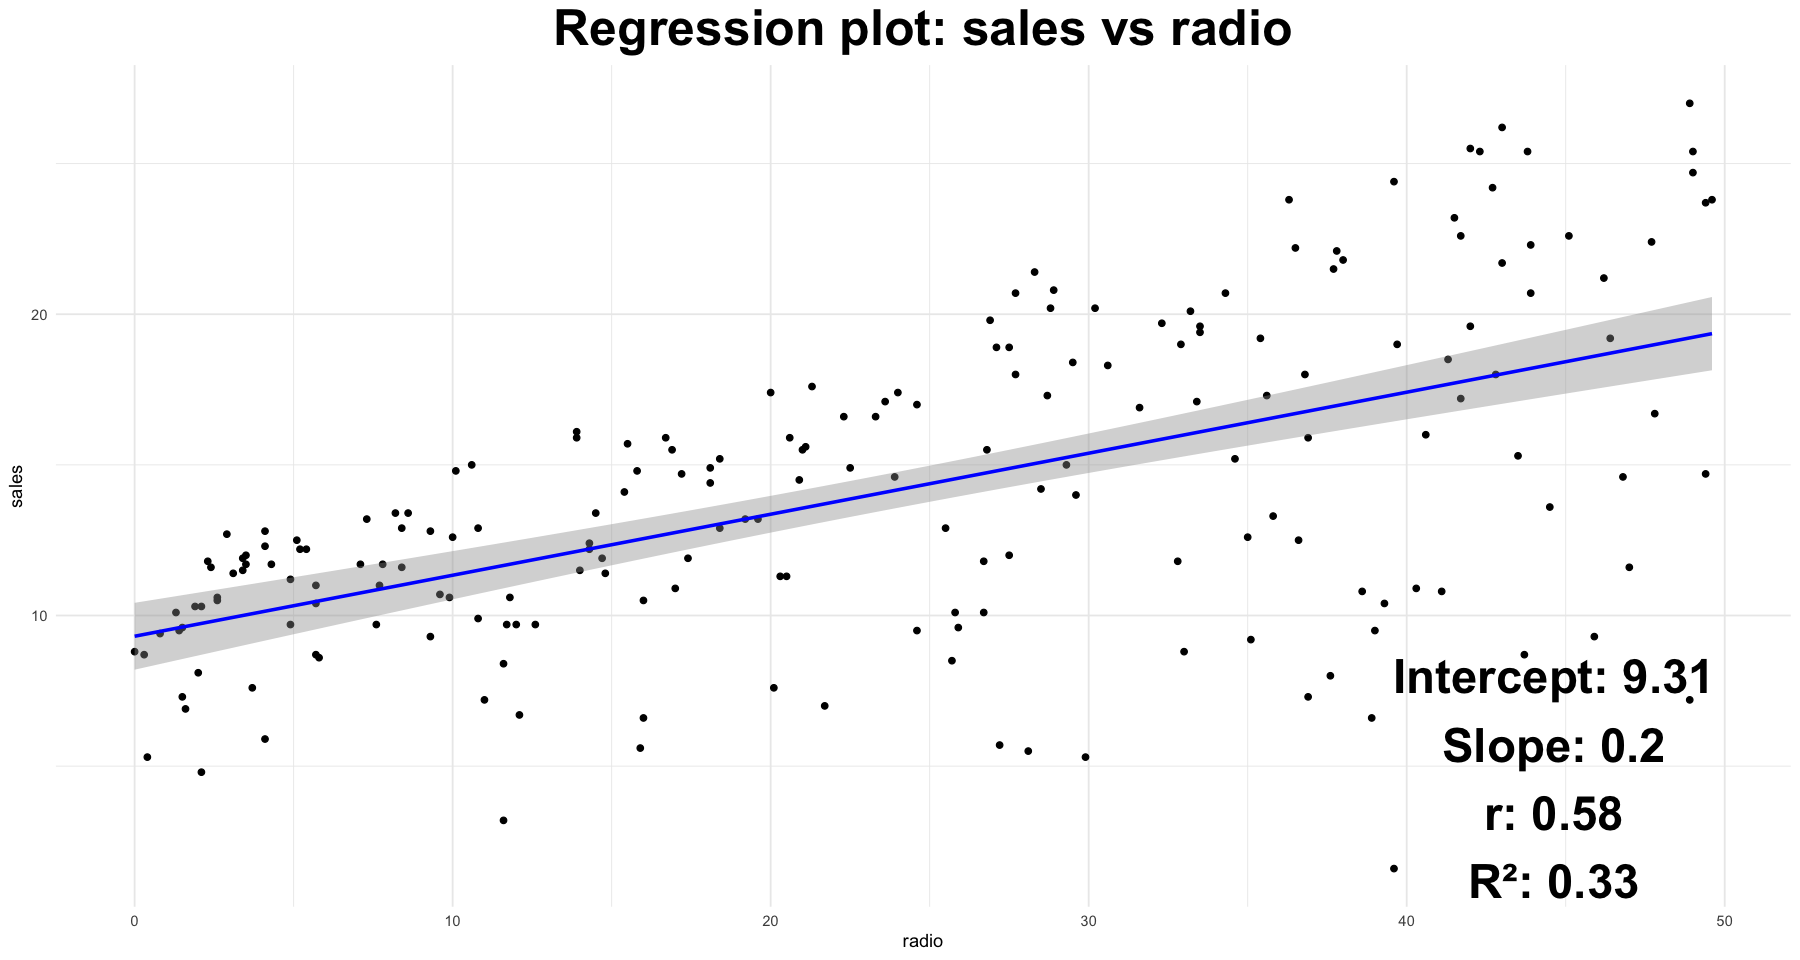

In [32]:
regplot(data = df, x = "radio", y = "sales")


Call:
lm(formula = as.formula(paste(y, "~", x)), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148



`geom_smooth()` using formula = 'y ~ x'


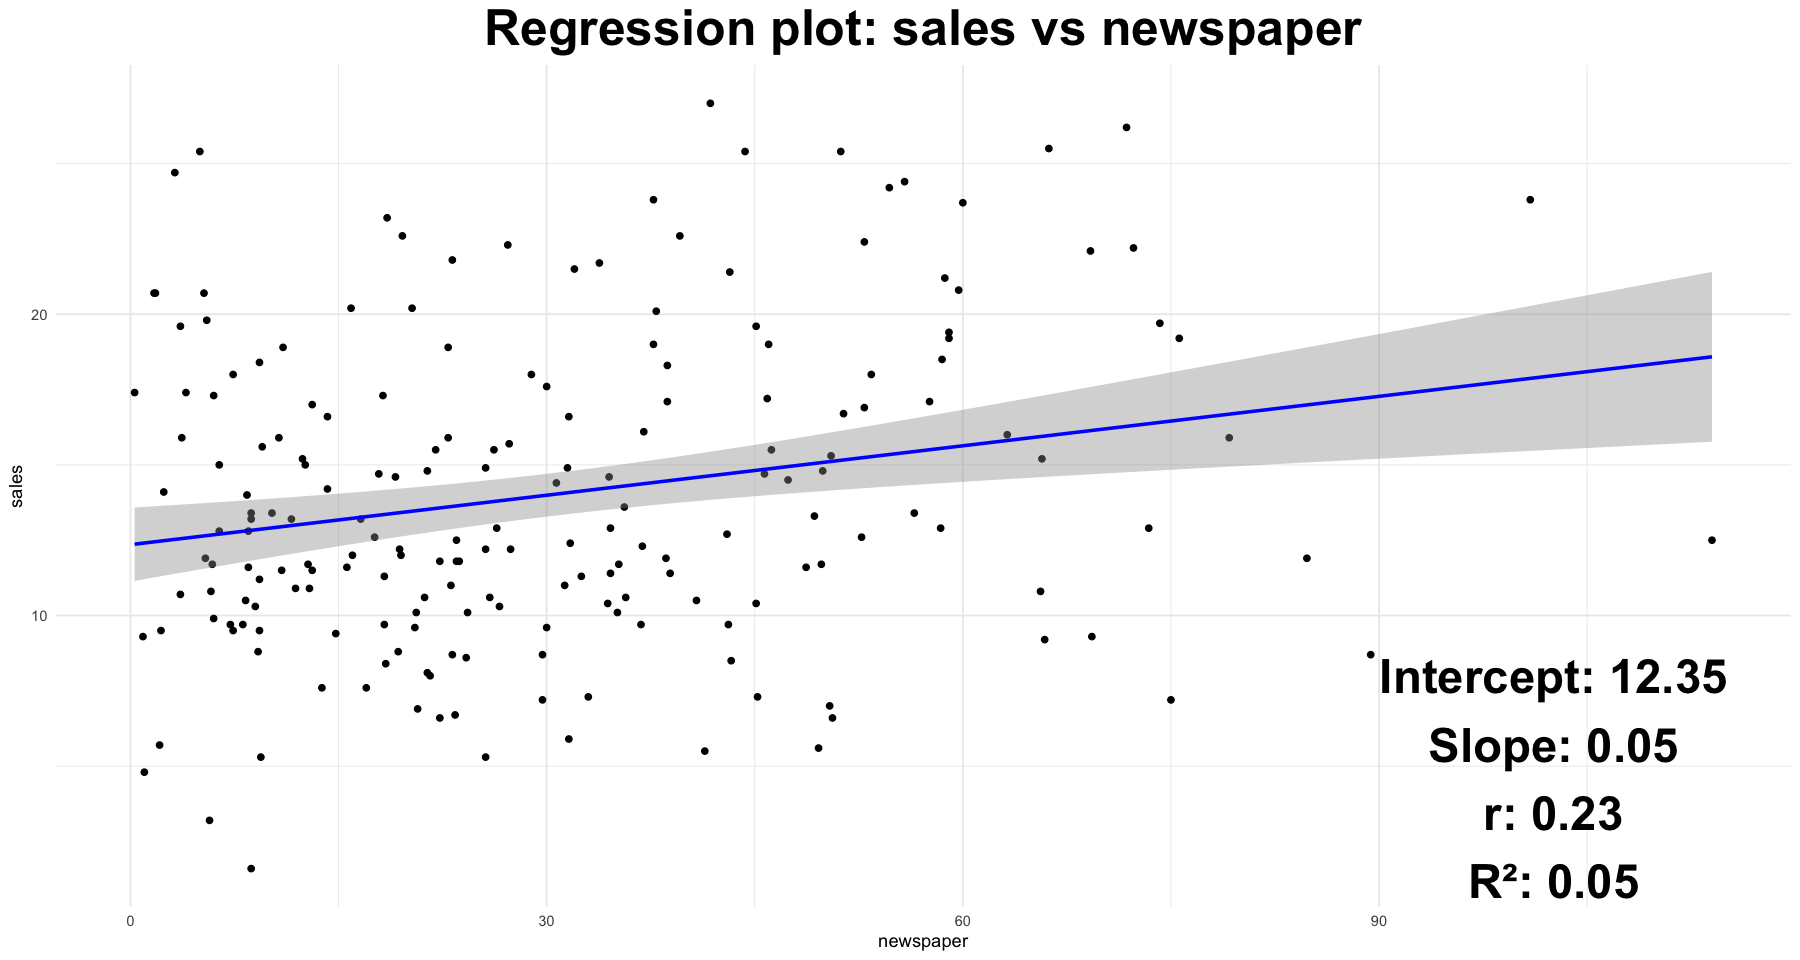

In [33]:
regplot(data = df, x = "newspaper", y = "sales")

___

In [34]:
multiple_reg <- lm(sales ~ TV + radio + newspaper, data = df)
summary(multiple_reg)


Call:
lm(formula = sales ~ TV + radio + newspaper, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [35]:
# EOF